<img src ='11.jpg'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


Makine öğreniminin ana araştırma alanlarından biri su kalitesinin analizidir. Su içilebilirliği analizi olarak da bilinir çünkü buradaki görevimiz, suyun içilebilirliğini etkileyen tüm faktörleri anlamak ve belirli bir su örneğinin tüketime uygun olup olmadığını sınıflandırabilen bir makine öğrenimi modeli yetiştirmektir.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

In [4]:
df.sample(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1383,6.810345,166.592425,18852.122979,7.847712,NaN,294.383914,13.447314,54.117664,4.115696,0
961,6.776879,189.438813,19663.791312,8.386404,375.457345,420.357392,14.831560,61.050420,3.322065,0
1768,6.957803,219.239952,20215.632849,7.054093,306.647384,431.370662,17.427145,56.435646,4.587745,0
3111,8.761768,212.426952,14168.924869,6.385733,NaN,488.599547,12.601801,60.237073,4.673548,0
757,8.370440,231.442553,15063.814968,12.279374,NaN,422.293819,15.027088,67.503004,3.210635,1
866,6.987042,169.727116,19472.624328,5.017698,366.018920,425.670964,17.314681,48.882198,4.475161,0
1423,8.665692,162.359687,3802.411681,6.281553,NaN,337.972823,19.270709,84.192581,3.494032,0
2867,7.125211,209.746771,16701.565975,7.458741,320.500945,404.704596,18.952797,92.347375,3.908075,1
2430,NaN,179.796205,17029.534893,7.018990,371.675555,404.672108,11.593431,46.504605,4.459394,1
601,NaN,220.552524,28135.076838,7.978098,307.652451,421.464253,17.532298,86.848098,3.569570,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [46]:
#pip install pycaret

In [12]:
from pycaret.classification import*

In [13]:
setup(df,target="Potability")

,Description,Value
0,Session id,7528
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2293, 10)"
6,Transformed test set shape,"(983, 10)"
7,Numeric features,9
8,Rows with missing values,38.6%
9,Preprocess,True


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6716,0.6943,0.3665,0.6422,0.4648,0.2528,0.2745,2.9930
qda,Quadratic Discriminant Analysis,0.6677,0.6817,0.3341,0.6449,0.4393,0.2357,0.2619,0.0200
et,Extra Trees Classifier,0.6660,0.6751,0.2995,0.6655,0.4098,0.2216,0.2574,0.2050
rf,Random Forest Classifier,0.6651,0.6606,0.3329,0.6335,0.4343,0.2296,0.2538,0.3630
gbc,Gradient Boosting Classifier,0.6511,0.6443,0.2715,0.6203,0.3763,0.1839,0.2142,0.2930
lightgbm,Light Gradient Boosting Machine,0.6503,0.6548,0.4001,0.5753,0.4700,0.2224,0.2313,0.2630
xgboost,Extreme Gradient Boosting,0.6463,0.6539,0.4268,0.5620,0.4840,0.2231,0.2284,0.2030
nb,Naive Bayes,0.6180,0.5874,0.2156,0.5283,0.3043,0.1019,0.1219,0.0150
lda,Linear Discriminant Analysis,0.6110,0.4929,0.0067,0.3333,0.0131,0.0056,0.0243,0.0170
lr,Logistic Regression,0.6106,0.5033,0.0033,0.2000,0.0065,0.0032,0.0146,0.3970


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [16]:
#Yukarıdaki sonuca göre, CatBoost Classifier algoritması, su kalitesi analizi görevi için bir makine öğrenme modelini eğitmek için en iyisidir

In [17]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

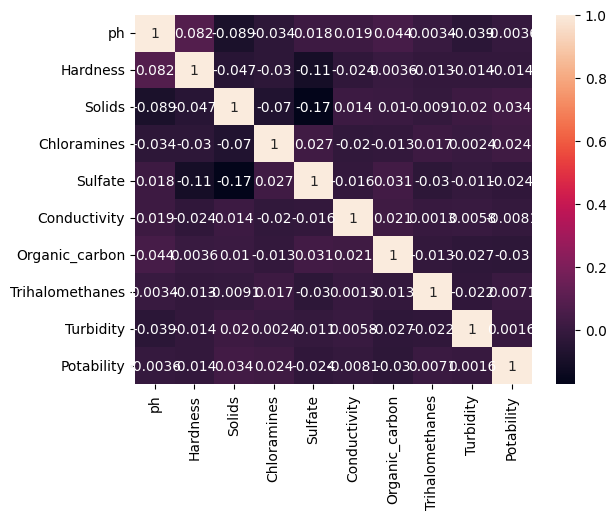

In [18]:
sns.heatmap(df.corr(),annot=True)

In [21]:
model = create_model("catboost")
predict = predict_model(model, data=df)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.6933,0.3444,0.7561,0.4733,0.3024,0.3481
1,0.6261,0.6470,0.3000,0.5400,0.3857,0.1474,0.1606
2,0.6391,0.6148,0.3333,0.5660,0.4196,0.1824,0.1959
3,0.6943,0.7393,0.4556,0.6613,0.5395,0.3221,0.3347
4,0.7074,0.7566,0.4111,0.7255,0.5248,0.3361,0.3644
5,0.6769,0.7097,0.4157,0.6271,0.5000,0.2755,0.2882
6,0.6463,0.6703,0.3596,0.5714,0.4414,0.2017,0.2133
7,0.6638,0.7038,0.3708,0.6111,0.4615,0.2378,0.2535
8,0.6856,0.7498,0.3483,0.6889,0.4627,0.2729,0.3046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8236,0.9090,0.6268,0.8880,0.7349,0.6085,0.6292


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,NaN,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0,0,0.7625
1,3.716080,129.422928,18630.058594,6.635246,NaN,592.885376,15.180013,56.329075,4.500656,0,0,0.5537
2,8.099124,224.236252,19909.541016,9.275884,NaN,418.606201,16.868637,66.420090,3.055934,0,0,0.7645
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.7457
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,0.6778


In [23]:
#Yukarıdaki sonuçlar tatmin edici görünüyor

In [27]:

import plotly.express as px
data = df
figure = px.histogram(df, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [28]:

figure = px.histogram(df, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [29]:
figure = px.histogram(data, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

In [30]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [31]:
#Yukarıda Auto ML ile çözdüğümüz modeli , CatBoost Classifier modelini kullanarak tekrar çözelim

In [34]:
x=df.drop(["Potability"],axis=1)
y=df["Potability"]

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

In [47]:
#pip install catboost

In [41]:
from catboost import CatBoostClassifier

In [42]:
model=CatBoostClassifier()

In [43]:
model.fit(x_train,y_train)

Learning rate set to 0.015543
0:	learn: 0.6917249	total: 3.65ms	remaining: 3.65s
1:	learn: 0.6903701	total: 6.27ms	remaining: 3.13s
2:	learn: 0.6891176	total: 8.45ms	remaining: 2.81s
3:	learn: 0.6874604	total: 10.6ms	remaining: 2.65s
4:	learn: 0.6859348	total: 12.9ms	remaining: 2.56s
5:	learn: 0.6844761	total: 14.8ms	remaining: 2.44s
6:	learn: 0.6829728	total: 17.3ms	remaining: 2.45s
7:	learn: 0.6816324	total: 19.3ms	remaining: 2.4s
8:	learn: 0.6802467	total: 21.7ms	remaining: 2.39s
9:	learn: 0.6792728	total: 24ms	remaining: 2.38s
10:	learn: 0.6782181	total: 26.4ms	remaining: 2.38s
11:	learn: 0.6767363	total: 28.6ms	remaining: 2.36s
12:	learn: 0.6755641	total: 31.2ms	remaining: 2.37s
13:	learn: 0.6744774	total: 33.5ms	remaining: 2.36s
14:	learn: 0.6737267	total: 35.7ms	remaining: 2.35s
15:	learn: 0.6726836	total: 38.6ms	remaining: 2.37s
16:	learn: 0.6717472	total: 42ms	remaining: 2.43s
17:	learn: 0.6706977	total: 44.4ms	remaining: 2.42s
18:	learn: 0.6691291	total: 47.1ms	remaining: 2.4

In [44]:
pred=model.predict(x_test)

In [45]:
model.score(x_test,y_test)

0.6935975609756098